In [592]:
URL='https://github.com/vipetrova/SVMraninking/raw/master/COPD%20data.xlsx'
from urllib.request import urlretrieve
urlretrieve(URL, 'COPD data.xlsx')

('COPD data.xlsx', <http.client.HTTPMessage at 0x1df190dd470>)

In [593]:
import os
os.chdir('C:\\SVM_copd')
os.getcwd()

'C:\\SVM_copd'

In [594]:
import pandas as pd
data = pd.read_excel("COPD data.xlsx")
data

,Primary ID,Activity increasing 1 to 3,4.11_153.0376,13.57_153.0327,12.76_153.0286,19.13_150.0115,20.24_142.9904,17.97_142.9865,16.16_142.9843,19.13_142.9809,...,18.34_1165.3911,13.46_1153.3862,11.54_1153.3785,4.65_1153.3722,4.84_1151.4021,12.43_1151.4018,15.98_1151.4006,14.29_1151.4000,15.87_1151.3741,9.57_1151.3733
0,oli_BG11_1,1,2.079551,0.000000,18.757410,12.583840,0.000000,0.000000,0.000000,31.811820,...,0.000000,0.975955,0.000000,0.000000,0.178146,0.00000,0.000000,0.00000,0.00000,1.082347
1,oli_BG11_2,1,1.675784,0.000000,16.497160,11.172750,0.000000,0.000000,10.860540,3.009283,...,0.000000,0.970939,0.870882,0.000000,0.000000,0.00000,0.105791,0.00000,0.00000,0.752318
2,oli_Lin_1,2,0.856432,25.765770,0.000000,0.000000,0.000000,2.936383,3.663038,0.000000,...,0.274373,6.642578,11.327210,4.756947,1.558672,0.00000,0.000000,0.00000,29.28206,17.033150
3,oli_Lin_2,2,1.020419,20.540220,0.000000,0.000000,0.000000,0.000000,0.241509,0.000000,...,0.000000,5.976575,10.939780,4.687953,1.548808,0.00000,0.000000,0.00000,29.01175,16.274210
4,oli_Cr_1,3,10.413300,2.101599,4.401113,0.988915,1.786108,2.371135,0.000000,0.000000,...,1.967147,0.000000,0.000000,1.004988,4.360585,12.28082,21.461600,12.96999,20.23370,1.577935
5,oli_Cr_2,3,10.472120,2.129452,4.021047,1.071116,2.996271,0.178076,0.442765,0.000000,...,2.192984,0.000000,0.151900,1.034000,4.397809,12.01187,20.383180,12.54960,0.00000,1.481075


In [595]:
data.keys()

Index(['Primary ID', 'Activity increasing 1 to 3', '4.11_153.0376',
       '13.57_153.0327', '12.76_153.0286', '19.13_150.0115', '20.24_142.9904',
       '17.97_142.9865', '16.16_142.9843', '19.13_142.9809',
       ...
       '18.34_1165.3911', '13.46_1153.3862', '11.54_1153.3785',
       '4.65_1153.3722', '4.84_1151.4021', '12.43_1151.4018',
       '15.98_1151.4006', '14.29_1151.4000', '15.87_1151.3741',
       '9.57_1151.3733'],
      dtype='object', length=649)

In [596]:
shuffled_data = data.sample(frac=1)

In [597]:
y_train = shuffled_data['Activity increasing 1 to 3']

In [598]:
x_train = shuffled_data.iloc[:,2:]

In [599]:
from sklearn.svm import SVR

In [600]:
import sklearn
sklearn.__version__

'0.19.1'

In [601]:
svr_lin = SVR(kernel='linear', C=1e3)
svr_lin_weight = SVR(kernel='linear', C=1e3)

In [602]:
weights = shuffled_data['Activity increasing 1 to 3']
weights = weights.replace(3, 100)
weights = weights.replace(2, 1)
weights = weights.replace(1, 1)

In [603]:
weights

3      1
2      1
5    100
4    100
1      1
0      1
Name: Activity increasing 1 to 3, dtype: int64

In [604]:
y_lin_weight = svr_lin.fit(x_train, y_train, sample_weight=weights).predict(x_train)

In [605]:
y_lin = svr_lin.fit(x_train, y_train).predict(x_train)
# svr_lin.fit(x, y, sample_weight=)

In [606]:
svr_lin.coef_.shape

(1, 647)

In [607]:
svr_lin.coef_

array([[  1.66669257e-05,  -1.46287611e-05,  -1.04165188e-05,
         -1.07198330e-05,   3.28679019e-06,   2.25545437e-06,
         -1.48187596e-05,  -3.37744055e-06,  -1.67938072e-06,
          6.06688957e-07,  -2.52941708e-05,   5.26487597e-06,
         -2.08071262e-05,  -3.05636156e-05,   5.05695645e-06,
         -1.41905157e-05,   5.40375091e-06,  -1.92672945e-05,
          9.15625202e-06,  -3.54670672e-07,   2.05170163e-06,
         -9.86265377e-06,   1.12653427e-06,   1.05873901e-05,
         -6.06238264e-06,  -1.03340031e-06,   4.68905048e-06,
         -1.17902534e-05,  -6.46884888e-06,  -2.51325715e-06,
         -3.74348839e-05,   3.11190285e-06,   3.11474662e-06,
          4.17071913e-05,   6.78925603e-06,  -2.92784168e-06,
         -3.87617508e-06,   1.69772404e-06,  -1.01229818e-05,
         -1.51722812e-06,   4.92156141e-06,  -1.19951304e-05,
         -4.43155373e-06,  -5.59816058e-07,   3.30354045e-06,
          4.97462420e-06,   1.05423090e-05,  -1.69824868e-05,
        

In [608]:
x_train.shape

(6, 647)

<Container object of 647 artists>

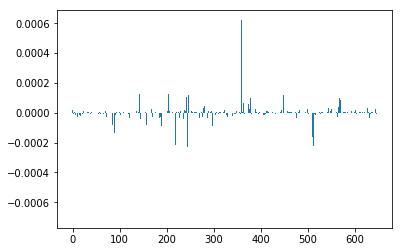

In [609]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(range(x_train.shape[1]), svr_lin.coef_.squeeze())


In [610]:
svr_lin.support_vectors_.shape

(3, 647)

<Container object of 647 artists>

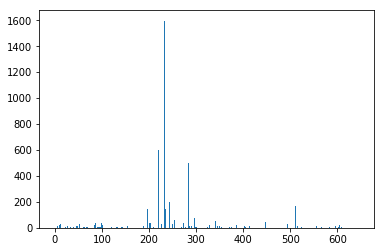

In [611]:
level3 = svr_lin.support_vectors_[2]
# change number to 1 and 0 for activity 2 and 1 respectively
level2 = svr_lin.support_vectors_[1]
level1 = svr_lin.support_vectors_[0]
fig, ax = plt.subplots()
ax.bar(range(x_train.shape[1]), level3.squeeze())


In [612]:
import numpy as np
l3id = pd.DataFrame(list(zip(data.keys()[2:],level3,
                             svr_lin.coef_.squeeze())),
                    columns = ["chem", "SVC3", "SVC_coeff"]
                   )

In [613]:
#import numpy as np
#l3id = pd.DataFrame(list(zip(data.keys()[2:],level3, 0 
#                             svr_lin.coef_.squeeze())),
#                    columns = ["chem", "SVC3", "SVC_coeff"]
#                   )

In [614]:
l3id[l3id["SVC_coeff"]>0].sort_values(by="SVC3", ascending=False)

,chem,SVC3,SVC_coeff
242,17.02_479.1191,208.130000,1.083843e-04
194,14.83_449.1257,147.273200,3.565363e-04
197,14.83_449.0902,147.227500,3.567907e-04
247,17.33_477.1472,77.618030,7.922550e-05
447,20.57_655.2122,72.700980,9.928592e-06
241,13.48_479.1228,64.261190,3.703312e-04
254,15.62_493.1205,61.553560,5.903798e-06
448,20.67_655.1700,44.808480,1.183113e-04
279,15.33_495.1326,43.323540,8.060797e-06
281,15.49_495.0977,43.176050,4.770956e-06


In [615]:
pd.DataFrame?

In [616]:
level3.shape

(647,)

In [617]:
svr_lin?

In [618]:
import sklearn
sklearn.__version__

'0.19.1'

In [619]:
l3id.to_excel("svr1_w.xlsx")